In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense, Dropout
import os
from sklearn.metrics import mean_squared_error

ticker = 'WMT'

df = pd.read_csv('{}.csv'.format(ticker))
df = df['Adj Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [0]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    return np.reshape(x,(x.shape[0], x.shape[1], 1)), np.array(y)

x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [0]:
model = Sequential()
model.add(LSTM(units=40, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=40))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
62/62 [==============================] - 3s 42ms/step - loss: 0.0154
Epoch 2/5
62/62 [==============================] - 3s 43ms/step - loss: 8.0035e-04
Epoch 3/5
62/62 [==============================] - 3s 43ms/step - loss: 7.0863e-04
Epoch 4/5
62/62 [==============================] - 3s 44ms/step - loss: 7.1525e-04
Epoch 5/5
62/62 [==============================] - 3s 44ms/step - loss: 6.5442e-04


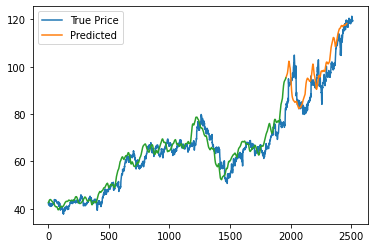

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
train_pred = scaler.inverse_transform(model.predict(x_train))

plt.plot(df, label="True Price")
plt.plot(range(len(y_train),len(y_train)+len(predictions)),predictions, label='Predicted')
plt.plot(range(len(x_train)), train_pred)
plt.legend()

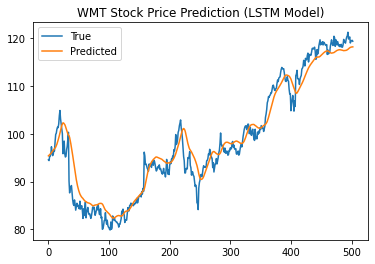

In [0]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.title('{} Stock Price Prediction (LSTM Model)'.format(ticker))
plt.plot(y_test_scaled, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.savefig('{}_LSTM.png'.format(ticker))

In [0]:
# Prints the RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, predictions))
print(rmse)

2.835871675841769


In [0]:
with open("rsme.txt", "a+") as myfile:
    myfile.write("{} {} lstm\n".format(ticker,rmse))

In [0]:
new_df = pd.DataFrame(predictions, columns = ['pred_test'])
new_df.to_csv('{}_LSTM_pred_test.csv'.format(ticker))
new_df = pd.DataFrame(train_pred, columns = ['pred_train'])
new_df.to_csv('{}_LSTM_pred_train.csv'.format(ticker))